In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-02.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

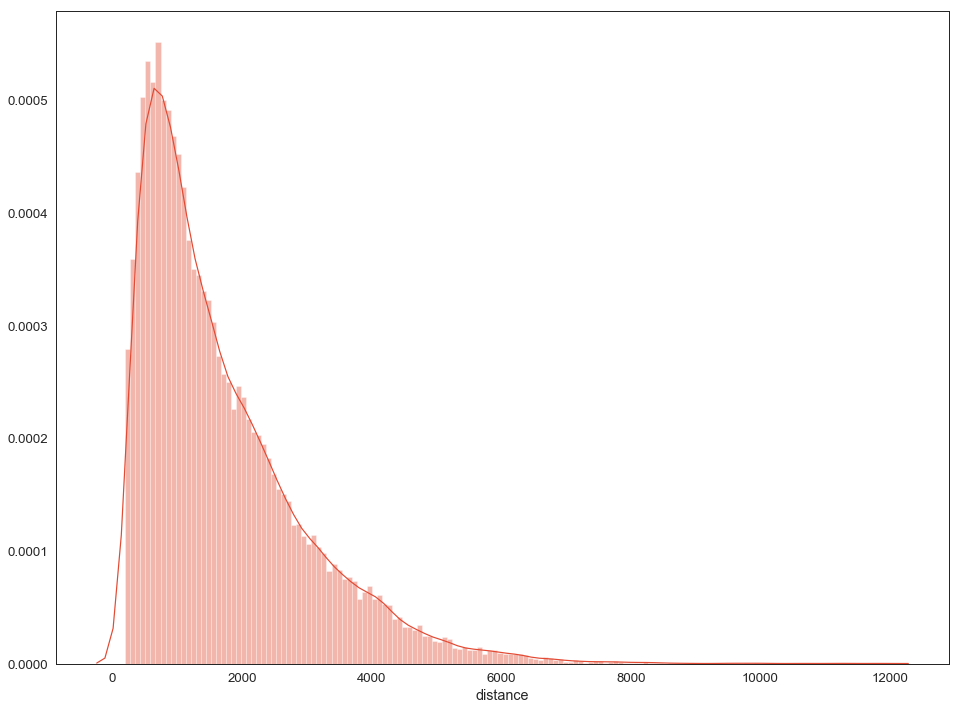

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
gamma,3515.685125,-1.280707e+06,inf,2.160121e-08
beta,3603.263378,-1.269214e+06,inf,2.785658e-08
burr,3298.044437,-1.193759e+06,inf,1.481744e-07
lognorm,3233.223195,-1.186665e+06,inf,1.734291e-07
norm,5279.504715,-1.114307e+06,inf,8.615362e-07


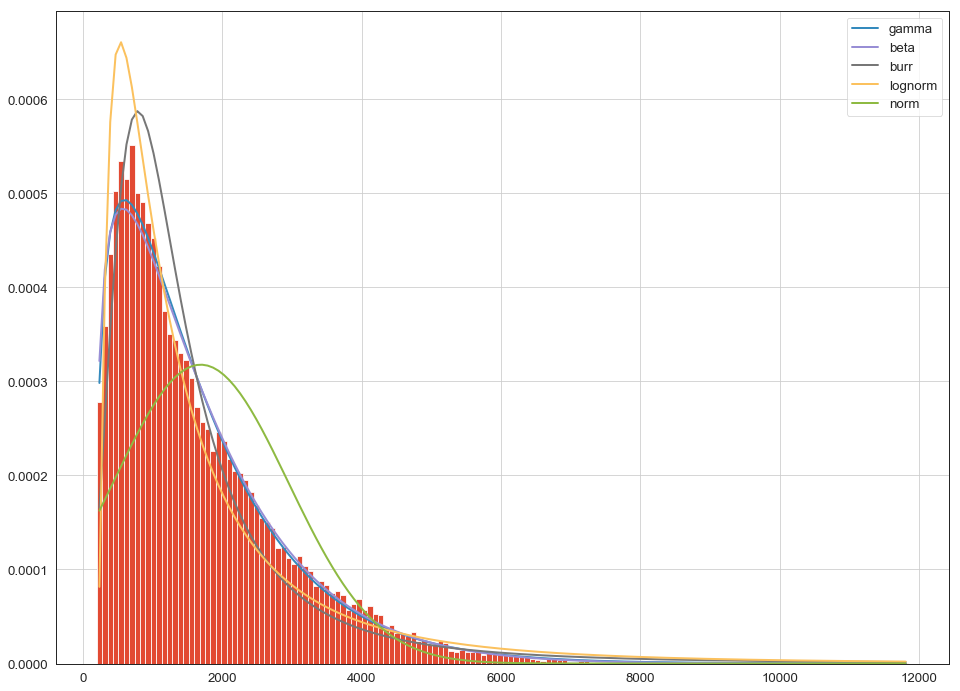

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'gamma': (1.3636834127272919, 198.0624630103843, 1095.925256440988)}

In [8]:
f.get_best(method = 'aic')

{'lognorm': (1.0404691328255127, 198.65481277086832, 996.2939703835807)}

In [9]:
f.get_best(method = 'bic')

{'gamma': (1.3636834127272919, 198.0624630103843, 1095.925256440988)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3603.263378,-1.269214e+06,inf,2.785658e-08
burr,3298.044437,-1.193759e+06,inf,1.481744e-07
alpha,3190.633419,-1.145581e+06,inf,4.308507e-07
norm,5279.504715,-1.114307e+06,inf,8.615362e-07
bradford,2912.267021,-1.113694e+06,inf,8.730999e-07


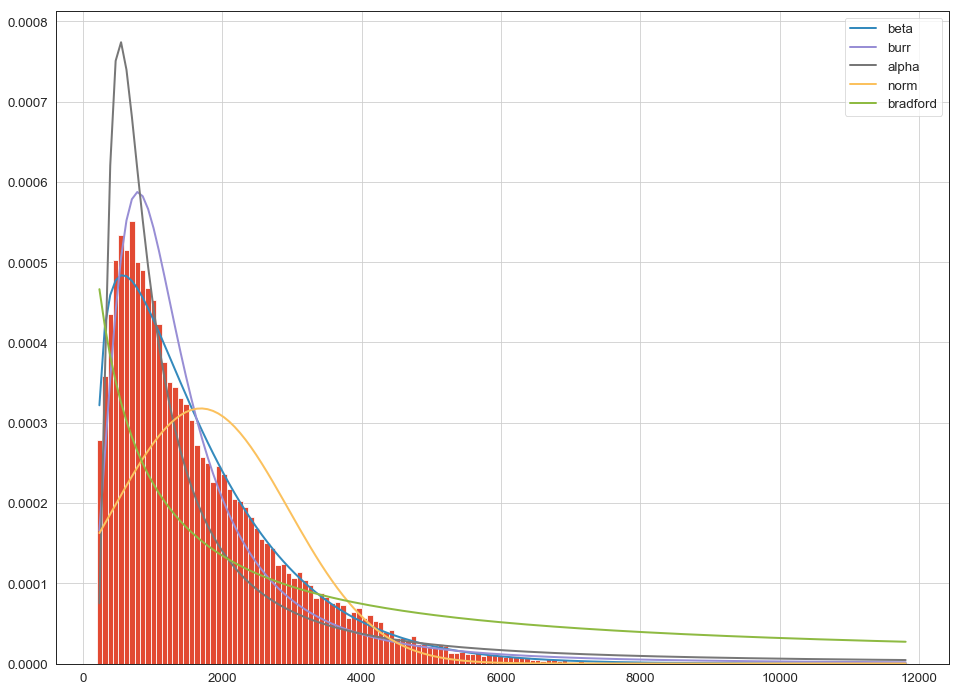

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,4062.738053,-1.188982e+06,inf,1.647508e-07
expon,3366.479041,-1.165816e+06,inf,2.752856e-07
dgamma,3993.655968,-1.122565e+06,inf,7.173513e-07
cosine,3049.618934,-1.067475e+06,inf,2.430973e-06
chi2,376613.886220,-1.043692e+06,3.834216,4.115784e-06


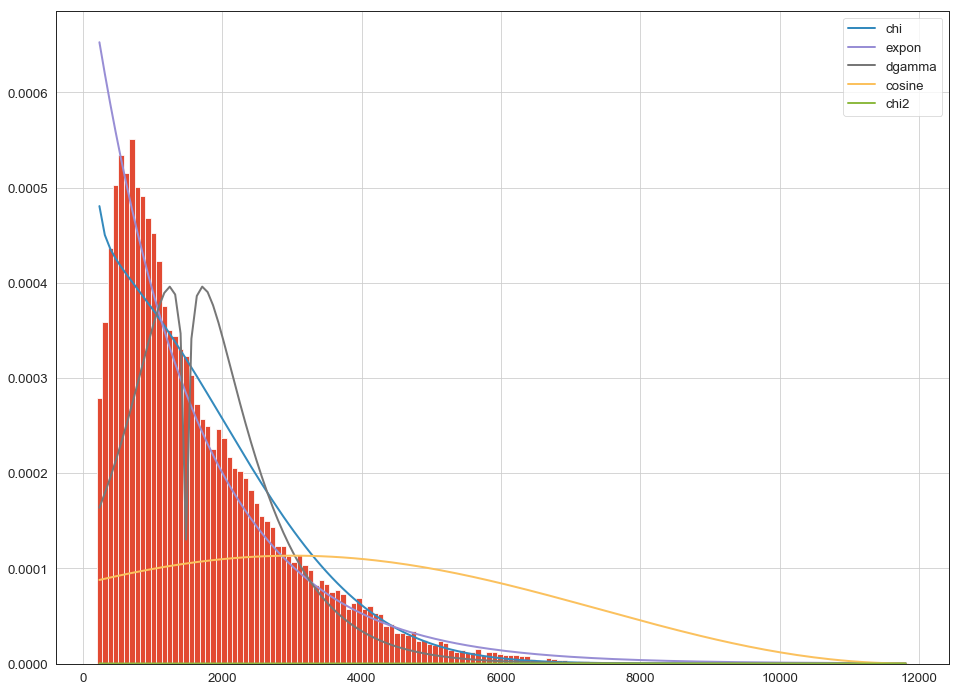

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3515.685125,-1.280707e+06,inf,2.160121e-08
exponnorm,3419.390996,-1.240734e+06,inf,5.235982e-08
f,3414.352198,-1.220495e+06,inf,8.195740e-08
fisk,3271.800232,-1.210186e+06,inf,1.030045e-07
fatiguelife,3435.215604,-1.055473e+06,inf,3.170537e-06


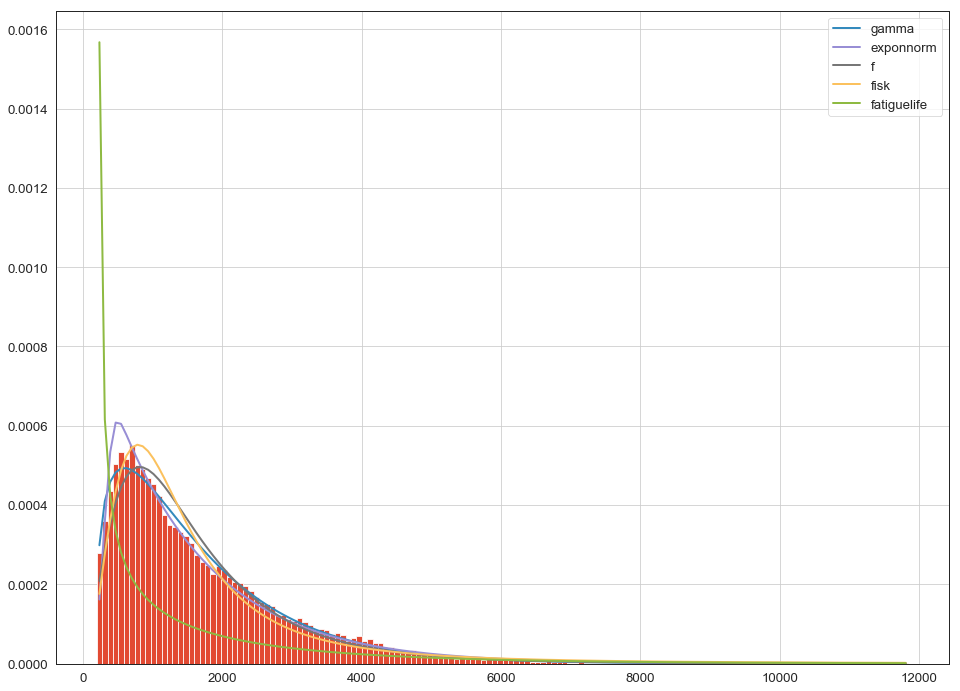

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,3233.223195,-1.186665e+06,inf,1.734291e-07
gengamma,3370.938392,-1.165624e+06,inf,2.763230e-07
levy,3127.965252,-1.125545e+06,inf,6.716865e-07
genexpon,3361.885708,-1.118356e+06,inf,7.870697e-07
loggamma,5381.514465,-1.113871e+06,inf,8.696997e-07


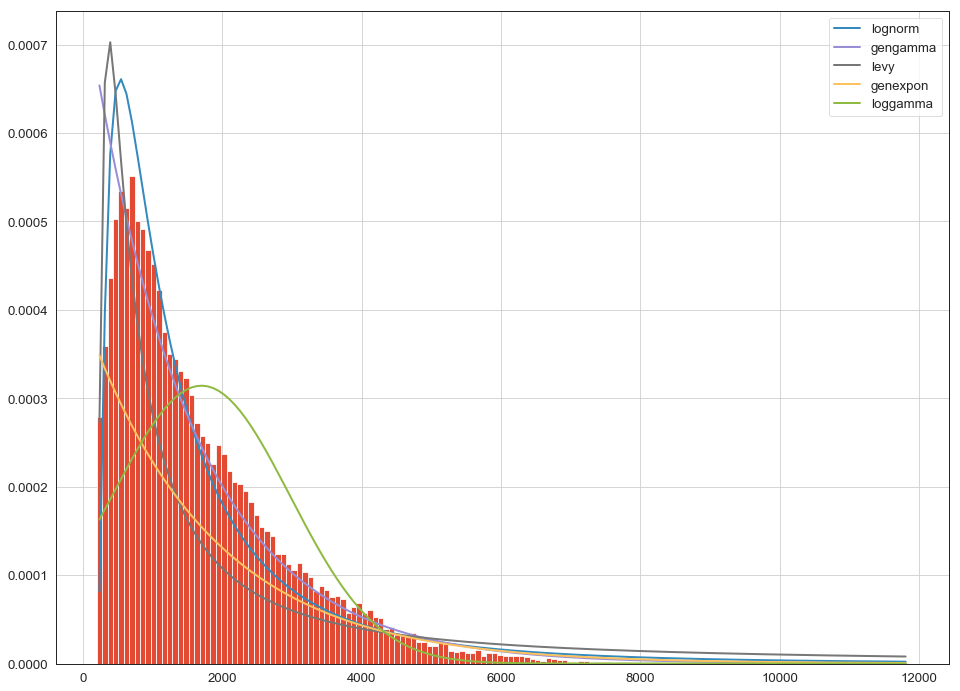

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3515.685084,-1.280707e+06,inf,2.160121e-08
logistic,4093.438794,-1.123412e+06,inf,7.041843e-07
t,3961.232348,-1.115373e+06,inf,8.412417e-07
powerlaw,2914.401718,-1.078570e+06,inf,1.900853e-06
pareto,3234.332355,-1.033547e+06,inf,5.152817e-06


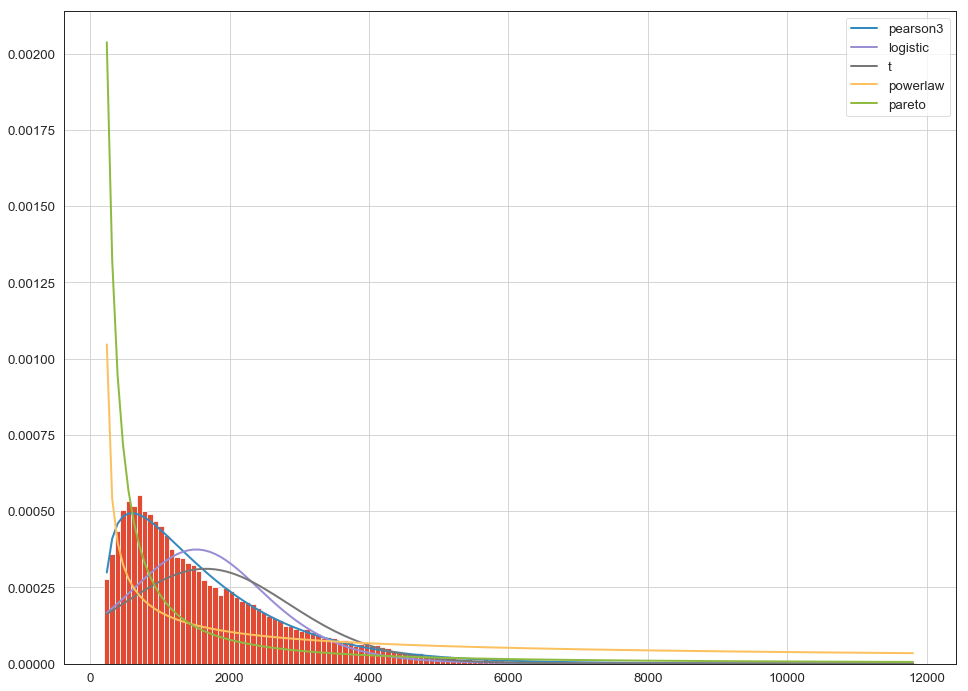

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
gamma,3515.685125,-1.280707e+06,inf,2.160121e-08
pearson3,3515.685084,-1.280707e+06,inf,2.160121e-08
beta,3603.263378,-1.269214e+06,inf,2.785658e-08
chi,4062.738053,-1.188982e+06,inf,1.647508e-07
genexpon,3361.885708,-1.118356e+06,inf,7.870697e-07


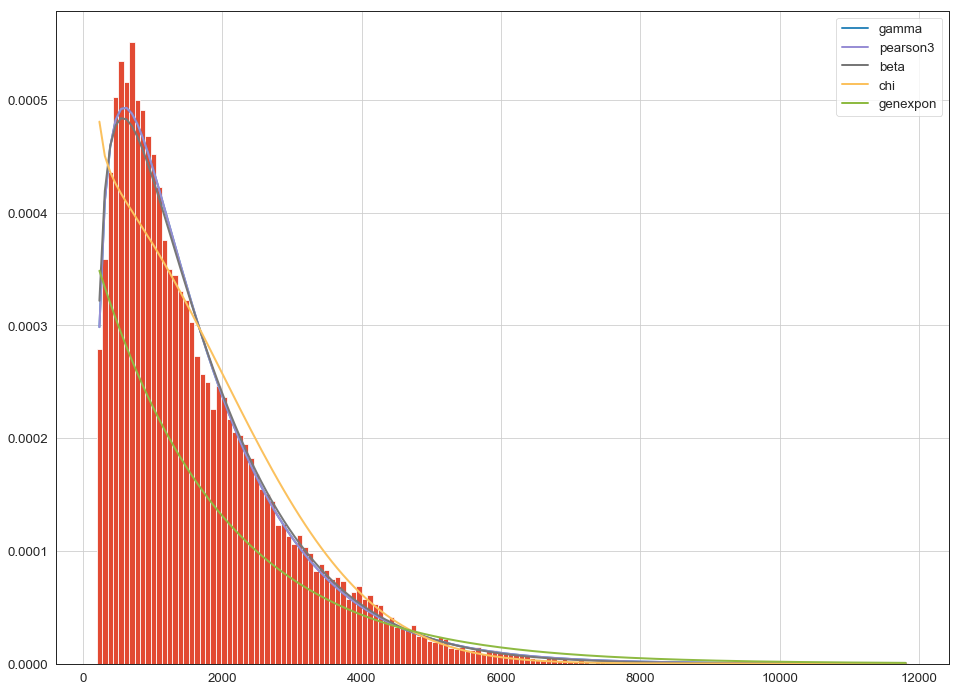

In [28]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'genexpon', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

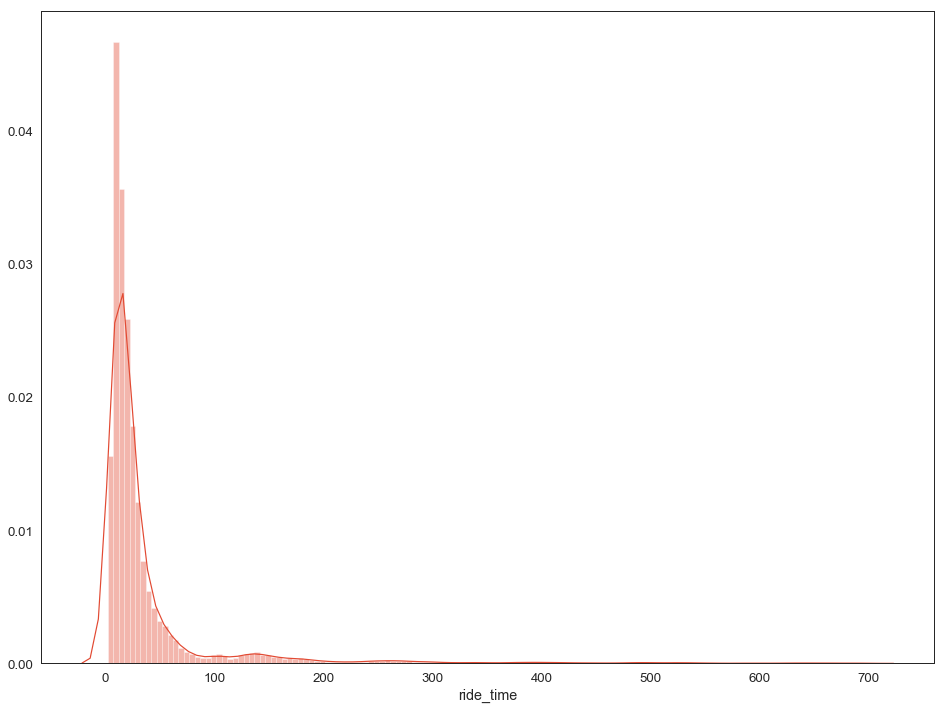

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2653.931274,-947863.834401,inf,0.000034
lognorm,2890.673726,-839724.223427,inf,0.000377
beta,3479.220948,-783481.600157,inf,0.001311
norm,5706.885905,-739282.979918,inf,0.003490
gamma,26755.786523,-725760.688123,inf,0.004708


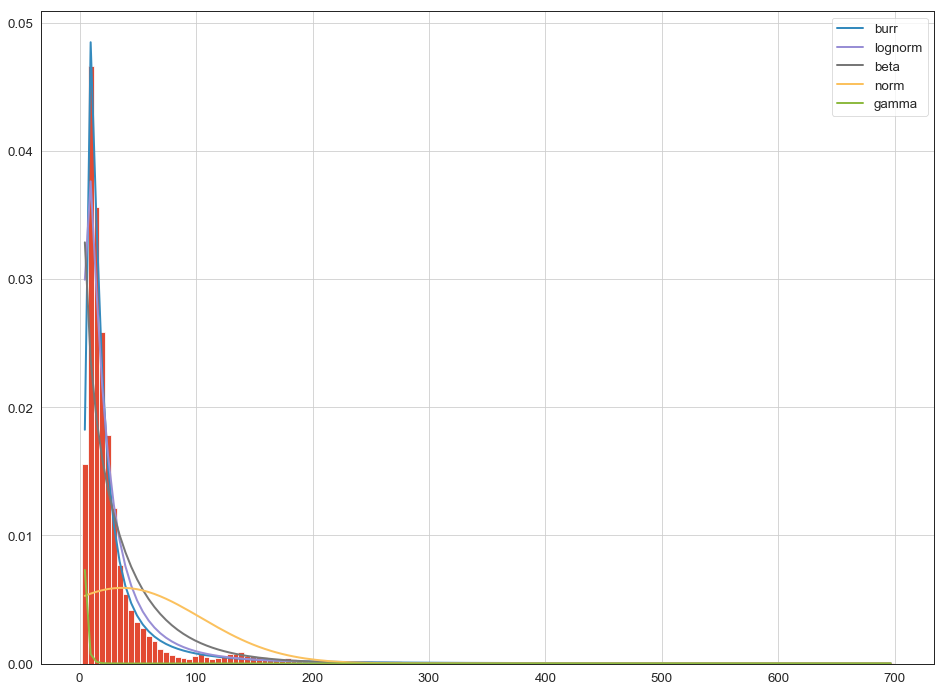

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.356734998497692,
  124.59173021074966,
  0.22772567969161564,
  0.3610725756456832)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.356734998497692,
  124.59173021074966,
  0.22772567969161564,
  0.3610725756456832)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.356734998497692,
  124.59173021074966,
  0.22772567969161564,
  0.3610725756456832)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2653.931274,-947863.834401,inf,0.000034
alpha,2599.962544,-943840.030148,inf,0.000038
beta,3479.220948,-783481.600157,inf,0.001311
norm,5706.885905,-739282.979918,inf,0.003490
bradford,1925.044970,-736503.935980,inf,0.003711


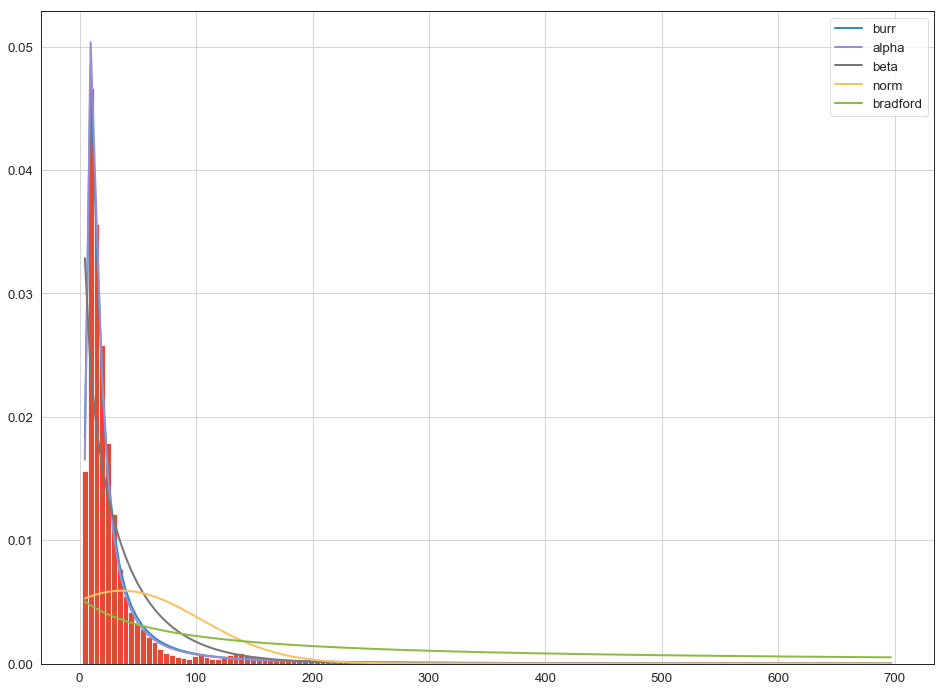

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
dgamma,3312.768980,-800005.338536,inf,0.000909
expon,3828.851143,-790401.045441,inf,0.001125
chi2,2409.057883,-764886.703457,inf,0.001979
chi,3336.422608,-761690.424339,inf,0.002124
cosine,2100.499920,-727574.656472,inf,0.004523


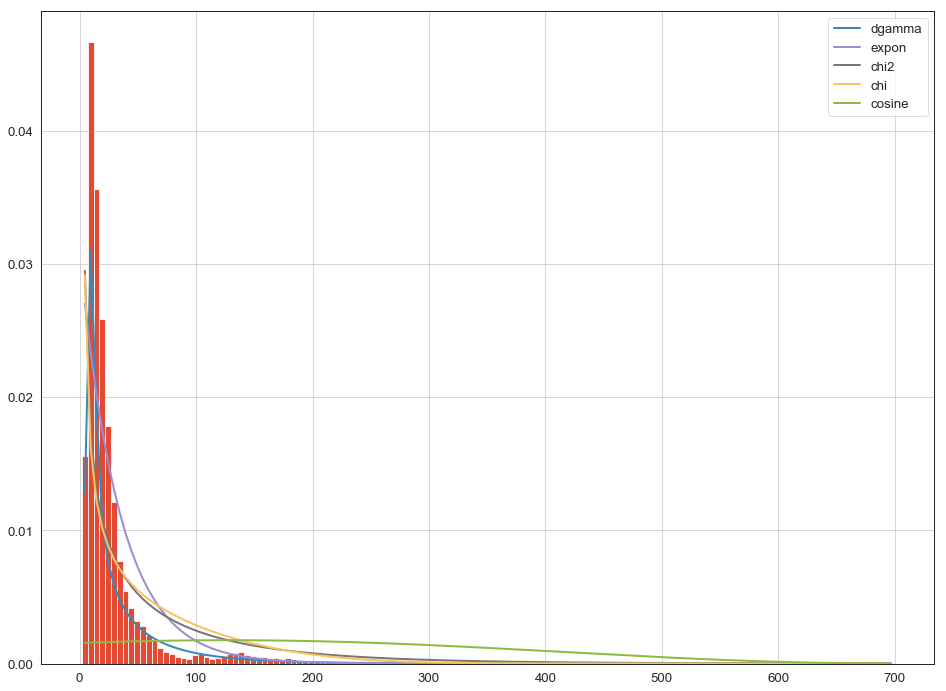

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2664.012327,-936680.120149,inf,0.000044
fisk,2802.780950,-869141.798354,inf,0.000197
fatiguelife,3071.575749,-815950.255113,inf,0.000639
exponnorm,3996.694973,-806788.562997,inf,0.000782
gamma,26755.786523,-725760.688123,inf,0.004708


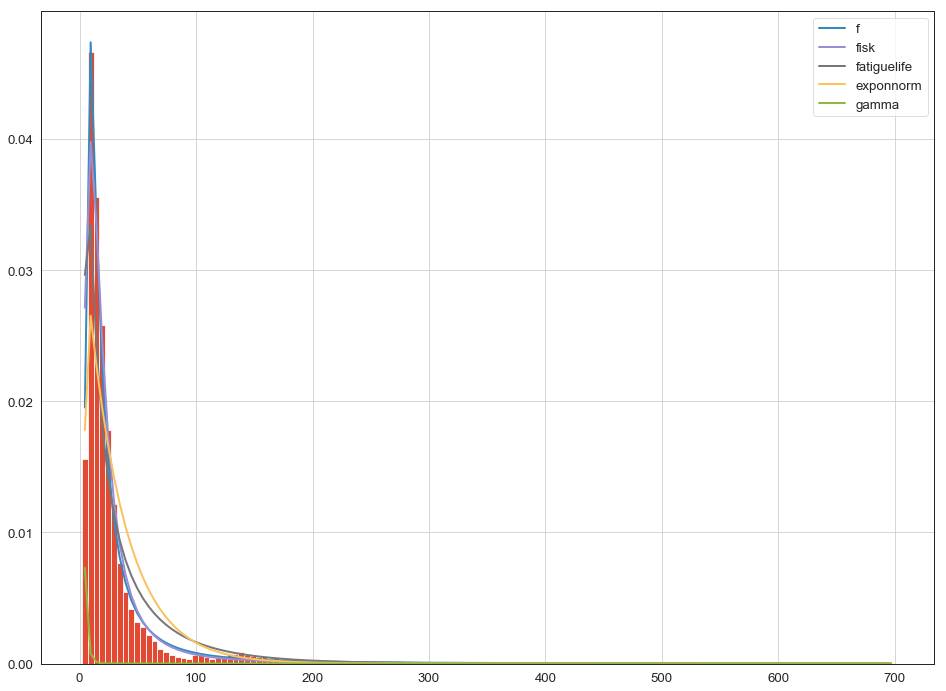

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2890.673726,-839724.223427,inf,0.000377
genexpon,3953.909193,-800689.864997,inf,0.000895
levy,2273.354325,-781764.458155,inf,0.001362
gengamma,3229.707715,-779609.223881,inf,0.001428
loggamma,5740.593549,-738879.724568,inf,0.003521


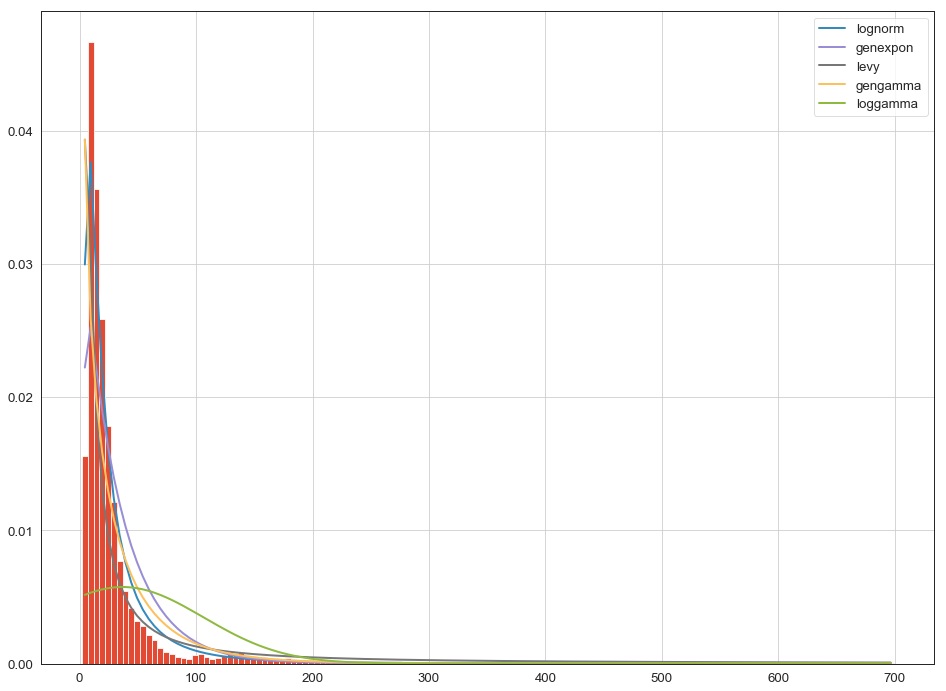

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2844.688449,-834984.158793,inf,0.000419
pareto,2601.903926,-786997.294727,inf,0.001213
pearson3,3939.432952,-783961.813114,inf,0.001297
logistic,5364.939653,-758625.563866,inf,0.002274
powerlaw,2038.732268,-747535.921674,inf,0.002906


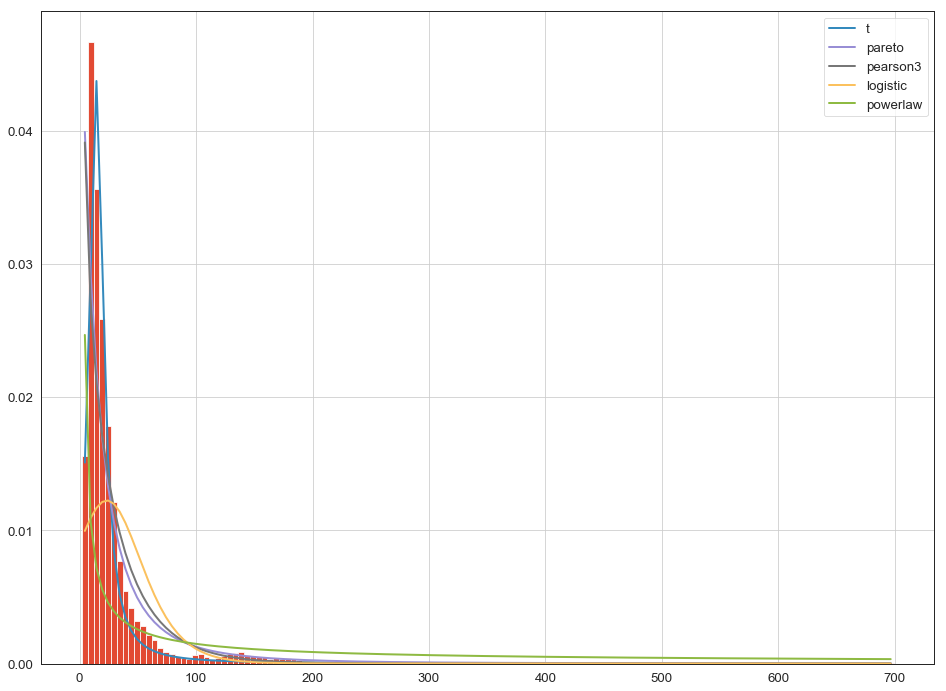

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2653.931274,-947863.834401,inf,0.000034
alpha,2599.962544,-943840.030148,inf,0.000038
f,2664.012327,-936680.120149,inf,0.000044
lognorm,2890.673726,-839724.223427,inf,0.000377
t,2844.688449,-834984.158793,inf,0.000419


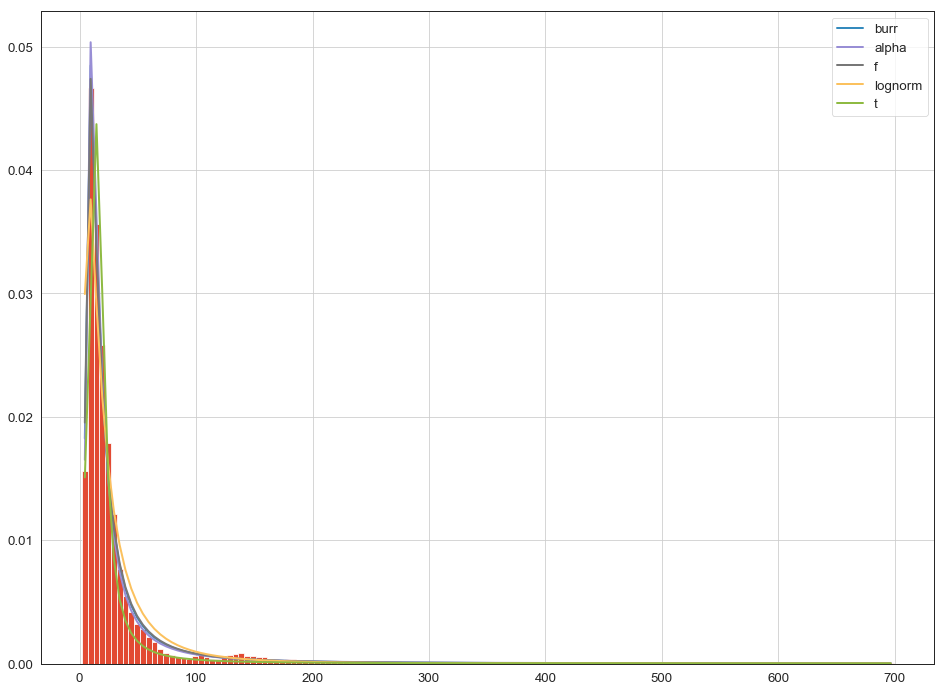

In [29]:
f = Fitter(rides,
           distributions= ['alpha','burr', 'f', 'lognorm', 't'], bins = 140)
f.fit()
f.summary()